

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
This dataset collects information from 100,000 medical appointments in Brazil. A number of characteristics about each patient are included in each row.

### Question(s) for Analysis
 In our analysis, we're trying to find answers for 3 questions:
Q1) What percentage of patients show up for their appointments?
Q2) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
Q3) Are hypertensive patients in our dataset more likely to have other diseases?
Q4) How aging affects the other variables in our dataset?

In [8]:
# Use this cell to set up import statements for all of the packages that you

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [12]:
# Loading the data and printing up a few lines
df = pd.read_csv('noshow.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Finding the shape of the dataset

In [13]:
#shaping the data to get a better overview
df.shape
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking the datatype of each column , and checking if there is any missing data

In [14]:
#checking the data's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We look for the number of null values and duplicates.

In [15]:
# Checking the number of null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Checking if the range of the values is reasonable.

In [16]:
# checking the range of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Checking for duplicates

In [17]:
#checking the number of duplicated values
sum(df.duplicated())

0


### Data Cleaning
Cleaning the data
 

We make column labels lower case letters and replace hyphens with underscores

In [18]:
#we are chnaging all the column names to lowercase
df.columns = [c.strip().lower().replace('-','_') for c in df.columns]
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We convert categorical values from to quantitative values (0,1) so that we can see their statistical properties

In [19]:
#converting the ctaegorical values to quantative values(0,1)
df['no_show'].replace(['No', 'Yes'], [0,1], inplace = True)
df['gender'].replace(['M', 'F'], [0,1], inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Dropping some columns that we may not need

In [20]:
#dropping some columns that we do not need 
df.drop(['appointmentid','patientid'],axis=1,inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


We remove the rows where age is given in negative values and continue exploring the statistical properties

In [21]:
#removing negative values
a=df.query('age <0')
df.drop(a.index, inplace=True)

In [22]:
def to_date(data):
    # take a date as a string and returns apython datetime object
    data=pd.to_datetime(data).dt.strftime('%Y-%m-%d')
    return pd.to_datetime(data)

In [23]:
#change scheduledday, appointmentday columns value to datetime rather than string 
df['scheduledday']=to_date(df['scheduledday'])
df['appointmentday']=to_date(df['appointmentday'])

We correct the syntax in the column labels.

In [23]:
#correcting some syntax errors
df.rename({'hipertension':'hypertension'}, axis=1, inplace=True)
df.rename({'handcap': 'handicap'}, axis=1, inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,56,JARDIM DA PENHA,0,1,1,0,0,0,0


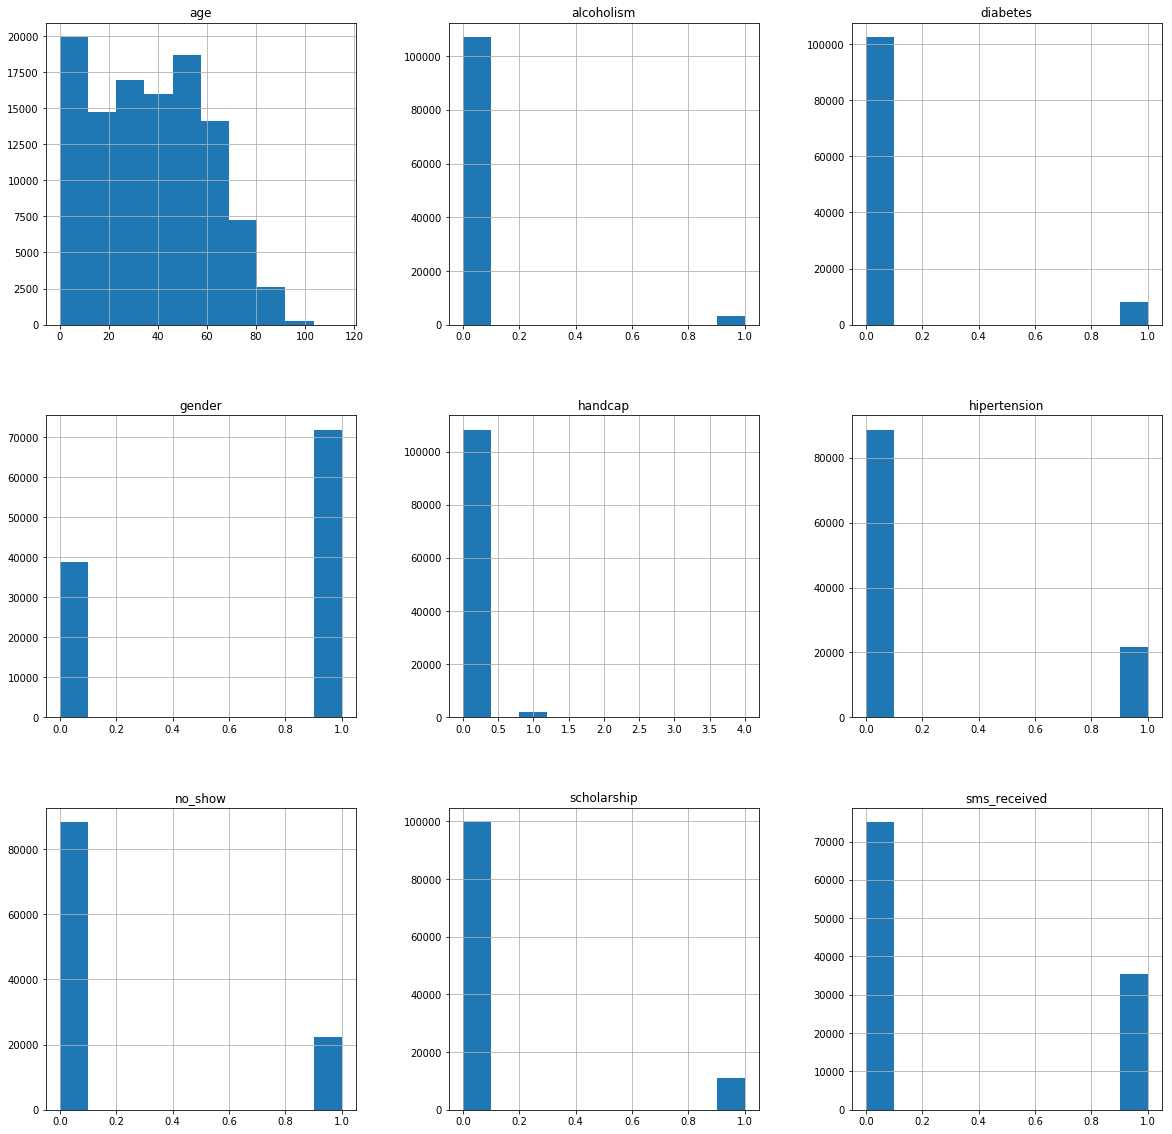

In [24]:
df.hist(figsize=(20,20));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What percentage of patients show up for their appointments?)

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
# showing the percentages of patients that showed up
proportion_no_show = df["no_show"].value_counts() / sum(df["no_show"].value_counts())
print("The percentage of patients that showed up for the appointment is about {}%."
      .format(round(proportion_no_show[0],4)*100))

The percentage of patients that showed up for the appointment is about 79.81%.


In [25]:
# printing % of patients that did not show up
print("The percentage of patients that didn't show up for the appointment is about {}%."
      .format(round(proportion_no_show[1],4)*100))

The percentage of patients that didn't show up for the appointment is about 20.19%.


Text(0.5,1,"The percentage of patients that showed up and didn't show up for the appointment.")

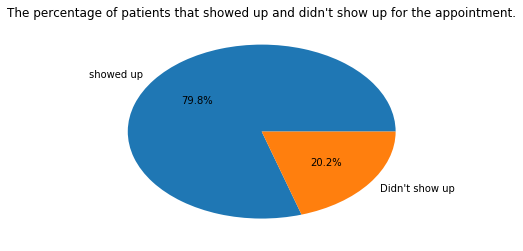

In [26]:
# plotting the percentage in a pie 
plt.pie(proportion_no_show, labels=["showed up", "Didn't show up"],autopct='%1.1f%%')
plt.title("The percentage of patients that showed up and didn't show up for the appointment.")

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

We look at the correlation between not showing up for the appointment and other variables.

In [27]:
# Continue to explore the data to address your additional research
# finding the correlation of the dataset
df.corrwith(df['no_show'])


gender          0.004122
age            -0.060327
scholarship     0.029134
hypertension   -0.035704
diabetes       -0.015181
alcoholism     -0.000197
handicap       -0.006077
sms_received    0.126428
no_show         1.000000
dtype: float64

We notice that not showing up for the appointment is direcly related to the number of sms messages received (12.6%)and time difference (18.6%). Therefore we plot the relationship on a histogram.

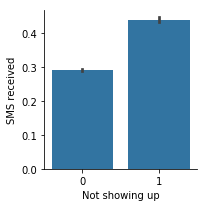

In [26]:
# plotting in a grid
sns.FacetGrid(df).map(sns.barplot, "no_show", "sms_received", order=[0,1]);
plt.xlabel('Not showing up')
plt.ylabel('SMS received')
plt.show()

In [25]:
# Plotting the histogram of the age for the patients that received and didn't receive SMS
plot_age_histogram(df[df["SMS_received"] == 0], alpha = 0.7, label="Not received")
plot_age_histogram(df[df["SMS_received"] == 1], alpha = 0.7, label="Received")
plt.legend();

NameError: name 'plot_age_histogram' is not defined

Next, we investigate the relationship between the locations and not showing up for the appointment.

We find the locations that have more than 500 patient to reduce the skewing of data and assign these patients (the rows) to a new DataFrame (x).

In [29]:
# plotting the differences
x=df[df['neighbourhood'].map(df['neighbourhood'].value_counts()) >500]

We plot a bar chart showing the top 10 locations where the patients are most likely not to show up for their appointments (df.no_show == 1) (measured using the mean)

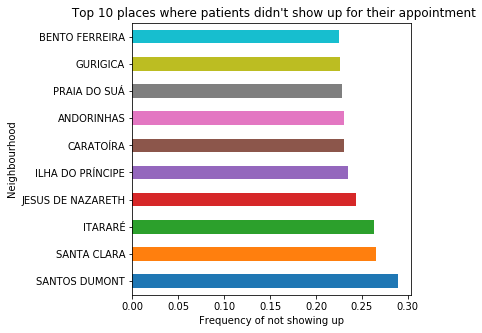

In [30]:
#plotting a bar showing the top 10 locations
x.groupby('neighbourhood').no_show.mean().sort_values(ascending=False).head(10).plot.barh(figsize=(5,5), title=' Top 10 places where patients didn\'t show up for their appointment');
plt.xlabel('Frequency of not showing up')
plt.ylabel('Neighbourhood')
plt.show()

We plot a bar chart showing the top 10 locations where the patients are most likely to show up for their appointments (df.no_show == 00) (measured using the mean)

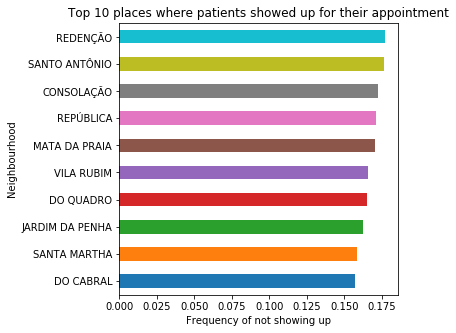

In [31]:
# plotting a bar chart showing top locations where patients are most likely to show up
x.groupby('neighbourhood').no_show.mean().sort_values(ascending=True).head(10).plot.barh(figsize=(5,5), title='Top 10 places where patients showed up for their appointment');
plt.xlabel('Frequency of not showing up')
plt.ylabel('Neighbourhood')
plt.show()

### Research Question 3  (Are hypertensive patients more likely to have other diseases?)

looking at the correlation between having hypertension and the other variables in the dataset.

In [32]:
# to find correlation
df.corrwith(df['hypertension'])

gender          0.055722
age             0.504586
scholarship    -0.019730
hypertension    1.000000
diabetes        0.433085
alcoholism      0.087970
handicap        0.080083
sms_received   -0.006270
no_show        -0.035704
dtype: float64

From above, We notice that the hypertensive patients are more likely to increase with age and to also have diabetes, alcoholism, and handicaps. Grouping hypertention with diabetes and also plotting

In [33]:
# Grouping hypertension with diabetes
df.groupby('hypertension').diabetes.mean()

hypertension
0    0.016422
1    0.297509
Name: diabetes, dtype: float64

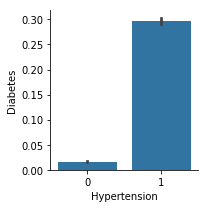

In [35]:
# plotting hypertension against diabetes
sns.FacetGrid(df).map(sns.barplot, "hypertension", "diabetes", order=[0,1]);
plt.xlabel('Hypertension')
plt.ylabel('Diabetes')
plt.show()

Grouping hypetension with alcoholism and also plotting it in a histogram

In [36]:
# grouping hypertension in relation to alcoholism
df.groupby('hypertension').alcoholism.mean()

hypertension
0    0.022913
1    0.060869
Name: alcoholism, dtype: float64

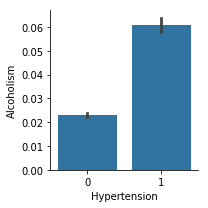

In [37]:
#plotting the relationship
sns.FacetGrid(df).map(sns.barplot, "hypertension", "alcoholism", order=[0,1]);
plt.xlabel('Hypertension')
plt.ylabel('Alcoholism')
plt.show()

### Research Question 4 (What variables are directly related to with aging?)

We look at the correlation between the age and the other variables in the dataset.

In [38]:
#looking at the correlation
df.corrwith(df['age'])

gender          0.106452
age             1.000000
scholarship    -0.092463
hypertension    0.504586
diabetes        0.292391
alcoholism      0.095810
handicap        0.078032
sms_received    0.012633
no_show        -0.060327
dtype: float64

From above, we find that aging is directly related to having hypertension, diabetes, alcoholism. Also aging is inversely related to having a scholarship. 

Therefore we group age with hypertension, diabetes and alcoholism

In [39]:
# grouping hypertension and age
df.groupby('hypertension').age.mean()

hypertension
0    31.308943
1    60.613596
Name: age, dtype: float64

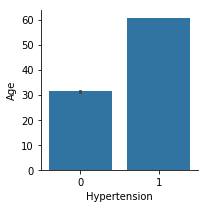

In [42]:
# plotting the relationship
sns.FacetGrid(df).map(sns.barplot, "hypertension", "age", order=[0,1]);
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()

In [44]:
#grouping diabetes by age
df.groupby('diabetes').age.mean()

diabetes
0    35.208962
1    61.372529
Name: age, dtype: float64

In [45]:
#grouping alcoholism by age
df.groupby('alcoholism').age.mean()

alcoholism
0    36.697161
1    49.593750
Name: age, dtype: float64

In [46]:
# grouping scholarship by age
df.groupby('scholarship').age.mean()

scholarship
0    37.794612
1    30.616242
Name: age, dtype: float64

The relationship between the showing up of the patient and his age will be analysed. To do this, a function that takes the dataframe that we want to analyse, the alpha and the label paramters and then visualizes this relationsship using the histogram will be implemented.

In [32]:
def plot_age_histogram(df, alpha=None, label=None):
    """
    Visualize the relationship between the showing up of the patient and his age using the histogram
    
    INPUT:
    df: The dataframe that we want to analyze
    alpha: The alpha parameter that will be used while plotting
    label: The label parameter that will be used while plotting
    
    """
    
    # Creating a numpy array that contains the edges of the age bins that will be used in the histogram
    # Each bin contains 5 years except the last bin that contains 15 years
    age_bins=np.append(np.arange(0,105,5),[115])
    
    # Calculating the values of the age histogram for the patients that showed up and the patients that didn't show up 
    showup_hist=np.histogram(df[df["no_show"]== 0]['age'],bins=age_bins,range=(0,115))
    no_showup_hist=np.histogram(df[df["no_show"]== 1]['age'],bins=age_bins,range=(0,115))
    
    # Calculating the percentage values of the age histogram for the patients that showed up
    showup_rates=showup_hist[0]/(showup_hist[0]+no_showup_hist[0])
    
    # Visualizing the histogram
    locations = np.append(np.arange(2.5,100,5), [107.5])
    width = np.append(np.full((20,),5),[15])
    plt.bar(locations,showup_rates,width = width, alpha=alpha, label=label)
    plt.xlabel("Age")
    plt.ylabel("Percentage of the patients that showed up.")
    plt.title("The percentage of patients that showed up and their age.")
    plt.ylim((0.6,1))
    return

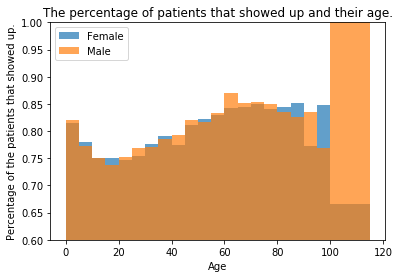

In [33]:
# Plotting the histogram of the age for females and males 
plot_age_histogram(df[df["gender"] == 1], alpha = 0.7, label="Female")
plot_age_histogram(df[df["gender"] == 0], alpha = 0.7, label="Male")
plt.legend();

It's concluded that the mean of showing up of males is very close to the mean of showing up of females in most ages.

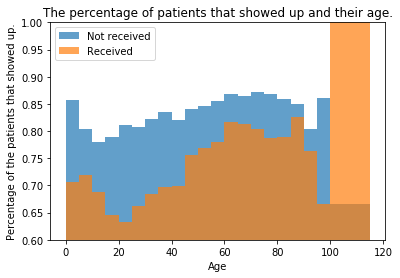

In [35]:
# Plotting the histogram of the age for the patients that received and didn't receive SMS
plot_age_histogram(df[df["sms_received"] == 0], alpha = 0.7, label="Not received")
plot_age_histogram(df[df["sms_received"] == 1], alpha = 0.7, label="Received")
plt.legend();

It's concluded that the mean of showing up of the patients that didn't receive SMS is greater than the mean of showing up of the patients that received SMS in all ages except for the patients that are higher than 100 years old

<a id='conclusions'></a>
## Conclusions

In our analysis, found that:
Q1) The percentage of patients that showed up for the appointment is about 79.81%.

Q2) We found that not showing up for the appointment is direcly related to the number of SMS messages received (12.6%)and time difference (18.6%). Also, we created visulaization to show which places the patients were most likely not to show up and to show up.

Q3) We noticed that the hypertensive patients are more likely to increase with age and to also have diabetes, alcoholism, and handicaps.

Q4) We concluded that aging is directly related to having hypertension, diabetes, alcoholism and that aging is also inversely related to having a scholarship.

## Limitations
1) Most variables are categorical, we don't have values for hypertension or diabetes. We only know if the patient have them or not. This may mislead our analysis.

2) We didn't divide the age into different groups. This may lead to wrong correlations as we didn't know at what age the variables increase or decrease in their relation to the age.

## Submitting your Project 


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0